<div id="container" style="position:relative;">
<div style="float:left"><h1>Home Value Analysis - Sri Casper</h1>
</div>
<div style="position:relative; float:right">

## Dataset

'prop_2016_cleaned.csv' and 'prop_2017_cleaned.csv' are the cleaned version of the original datasets from Zillow, an American real-estate marketplace company. Zillow uses 'Zestimate' to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. In this notebook, some machine learning techniques will be uesd to estimate the assessed values of the properties.

## Data Dictionary

`parcelid`: Unique identifier for parcels (lots) 

`bathroomcnt`: Number of bathrooms in home including fractional bathrooms

`bedroomcnt`: Number of bedrooms in home 

`buildingqualitytypeid`: Overall assessment of condition of the building from best (lowest) to worst (highest)

`calculatedfinishedsquarefeet`: Calculated total finished living area of the home 

`finishedsquarefeet12`: Finished living area

`fullbathcnt`: Number of full bathrooms (sink, shower + bathtub, and toilet) present in home

`latitude`: Latitude of the middle of the parcel multiplied by 10e6

`longitude`: Longitude of the middle of the parcel multiplied by 10e6

`lotsizesquarefeet`: Area of the lot in square feet

`propertylandusetypeid`: Type of land use the property is zoned for

`regionidcity`: City in which the property is located (if any)

`regionidcounty`: County in which the property is located

`regionidzip`: Zip code in which the property is located

`roomcnt`: Total number of rooms in the principal residence

`unitcnt`: Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)

`yearbuilt`: The Year the principal residence was built 

`structuretaxvaluedollarcnt`: The assessed value of the built structure on the parcel

`taxvaluedollarcnt`: The total tax assessed value of the parcel

`assessmentyear`: The year of the property tax assessment 

`landtaxvaluedollarcnt`: The assessed value of the land area of the parcel

`taxamount`: The total property tax assessed for that assessment year

`ageinyear`: The Year the principal residence was built to the inspection year

`assessedvalue`: The sum of the assessed value of the built structure on the parcel and the assessed value of the land area of the parcel

## Field of Interest

Explore the relationships within the datasets and compare the accuracy score of each model

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc

from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the data from .csv files
# Assign the file to 'prop_2016' and 'prop_2017'

prop_2016 = pd.read_csv('properties_2016.csv')
prop_2017 = pd.read_csv('properties_2017.csv')

## Data Wrangling

In [3]:
# Shape of the 'prop_2016' dataframe

prop_2016.shape

(2985217, 58)

In [4]:
# Shape of the 'prop_2017' dataframe

prop_2017.shape

(2985217, 58)

In [5]:
# Print out rows and columns of the dataframes

print(f"There are {prop_2016.shape[0]} rows and {prop_2016.shape[1]} columns in 'prop_2016'.")
print(f"There are {prop_2017.shape[0]} rows and {prop_2017.shape[1]} columns in 'prop_2017'.")

There are 2985217 rows and 58 columns in 'prop_2016'.
There are 2985217 rows and 58 columns in 'prop_2017'.


- Both dataframes contain the <b>same numbers of rows and columns</b>, 2,985,217 rows and 58 columns.

In [8]:
# View a quick summary of each column and its datatype

prop_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

In [6]:
# View a quick summary of each column and its datatype

prop_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

- Both dataframes contain <b>exactly the same columns.</b> However, <b>the values are not the same</b> and there is no need to combine the datasets. 

In [99]:
# View the dataframe (head)

prop_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [100]:
# View the dataframe (tail)

prop_2016.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# View the dataframe (head)

prop_2017.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [102]:
# View the dataframe (tail)

prop_2017.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Notice that there are some <b>missing values (or NaN) in both datasets.</b>

#### Duplicates

In [10]:
# Check for any duplicate

prop_2016.duplicated().sum()

0

In [11]:
# Check for any duplicate

prop_2017.duplicated().sum()

0

- There is <b>no duplicate</b> in both datasets.

#### Missing Values

In [ ]:
# Check for any missing value

prop_2016.isna().sum()
prop_2017.isna().sum()

In [12]:
# Check for any missing value

prop_2016.isna().sum()

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [13]:
# Check for any missing value

prop_2017.isna().sum()

parcelid                              0
airconditioningtypeid           2169855
architecturalstyletypeid        2979156
basementsqft                    2983590
bathroomcnt                        2957
bedroomcnt                         2945
buildingclasstypeid             2972486
buildingqualitytypeid           1043822
calculatedbathnbr                117156
decktypeid                      2967838
finishedfloor1squarefeet        2781459
calculatedfinishedsquarefeet      45097
finishedsquarefeet12             264431
finishedsquarefeet13            2977546
finishedsquarefeet15            2795032
finishedsquarefeet50            2781459
finishedsquarefeet6             2963735
fips                               2932
fireplacecnt                    2672093
fullbathcnt                      117156
garagecarcnt                    2094209
garagetotalsqft                 2094209
hashottuborspa                  2935155
heatingorsystemtypeid           1116053
latitude                           2932


In [14]:
# Calculate the proportion of missing values in prop_2016

(prop_2016.isna().sum() / prop_2016.shape[0]) * 100

parcelid                         0.000000
airconditioningtypeid           72.815410
architecturalstyletypeid        99.796966
basementsqft                    99.945465
bathroomcnt                      0.383959
bedroomcnt                       0.383557
buildingclasstypeid             99.576949
buildingqualitytypeid           35.063749
calculatedbathnbr                4.318346
decktypeid                      99.427311
finishedfloor1squarefeet        93.209304
calculatedfinishedsquarefeet     1.861339
finishedsquarefeet12             9.246664
finishedsquarefeet13            99.743000
finishedsquarefeet15            93.608572
finishedsquarefeet50            93.209304
finishedsquarefeet6             99.263002
fips                             0.383121
fireplacecnt                    89.527160
fullbathcnt                      4.318346
garagecarcnt                    70.411967
garagetotalsqft                 70.411967
hashottuborspa                  97.688141
heatingorsystemtypeid           39

In [15]:
# Calculate the proportion of missing values in prop_2017

(prop_2017.isna().sum() / prop_2017.shape[0]) * 100

parcelid                         0.000000
airconditioningtypeid           72.686676
architecturalstyletypeid        99.796966
basementsqft                    99.945498
bathroomcnt                      0.099055
bedroomcnt                       0.098653
buildingclasstypeid             99.573532
buildingqualitytypeid           34.966369
calculatedbathnbr                3.924539
decktypeid                      99.417831
finishedfloor1squarefeet        93.174433
calculatedfinishedsquarefeet     1.510677
finishedsquarefeet12             8.858016
finishedsquarefeet13            99.743034
finishedsquarefeet15            93.629106
finishedsquarefeet50            93.174433
finishedsquarefeet6             99.280387
fips                             0.098217
fireplacecnt                    89.510846
fullbathcnt                      3.924539
garagecarcnt                    70.152656
garagetotalsqft                 70.152656
hashottuborspa                  98.323003
heatingorsystemtypeid           37

In [16]:
# Lowest amount of missing values

((prop_2016.isna().sum() / prop_2016.shape[0]) * 100).min()

0.0

In [17]:
# Lowest amount of missing values

((prop_2017.isna().sum() / prop_2017.shape[0]) * 100).min()

0.0

In [18]:
# Highest amount of missing values

((prop_2016.isna().sum() / prop_2016.shape[0]) * 100).max()

99.94559859467502

In [19]:
# Highest amount of missing values

((prop_2017.isna().sum() / prop_2017.shape[0]) * 100).max()

99.94563209307732

- Both datasets have <b>similar amounts of missing values in each column.</b>
- The highest missing value in a column is <b>99.94%</b> and the lowest is 0%.
- <b>24 out of 58 columns</b> or approximately 40% of the columns in a dataset <b>contain more than 80% of missing values.</b>

#### Some observations found in the datasets

`propertycountylandusecode`

In [9]:
# Check the amount of data in each code

prop_2016['propertycountylandusecode'].value_counts()

0100    1153896
122      522145
0101     247494
010C     225410
1111     126491
         ...   
7301          1
070G          1
7842          1
0404          1
3414          1
Name: propertycountylandusecode, Length: 240, dtype: int64

In [10]:
# Check the amount of data in each code

prop_2017['propertycountylandusecode'].value_counts()

0100    1153332
122      522127
0101     248386
010C     225950
1111     127012
         ...   
7842          1
590V          1
121O          1
030C          1
3414          1
Name: propertycountylandusecode, Length: 234, dtype: int64

- `propertycountylandusecode` represents county land use code.
- This column should be dropped because the meanings of the codes are various depending on the area.  

`propertyzoningdesc`

In [11]:
# Check the amount of data in each code

prop_2016['propertyzoningdesc'].value_counts()

LAR1          275029
LAR3           67105
LARS           54859
LBR1N          52750
LAR2           48808
               ...  
LCM2DP-A12         1
LCC4-RIP75         1
SDR115333*         1
WHC0-R1*           1
RMM2*              1
Name: propertyzoningdesc, Length: 5638, dtype: int64

In [12]:
# Check the amount of data in each code

prop_2017['propertyzoningdesc'].value_counts()

LAR1          275246
LAR3           67089
LARS           54862
LBR1N          52750
LAR2           48858
               ...  
LORVD1233*         1
BFR16*             1
SLR2               1
HAC2VV             1
RMM2*              1
Name: propertyzoningdesc, Length: 5651, dtype: int64

- `propertyzoningdesc` represents description of the allowed land uses (zoning) for that property.
- This column should be dropped because the meanings of the codes are various depending on the area.

`rawcensustractandblock`

In [13]:
# Check the amount of data in each code

prop_2016['rawcensustractandblock'].value_counts()

6.059052e+07    1518
6.037920e+07    1455
6.059063e+07     895
6.037137e+07     886
6.037577e+07     825
                ... 
6.037533e+07       1
6.037910e+07       1
6.037301e+07       1
6.037300e+07       1
6.037901e+07       1
Name: rawcensustractandblock, Length: 99292, dtype: int64

In [14]:
# Check the amount of data in each code

prop_2017['rawcensustractandblock'].value_counts()

6.059052e+07    1576
6.037920e+07    1455
6.059052e+07     971
6.059063e+07     895
6.037137e+07     886
                ... 
6.059012e+07       1
6.037541e+07       1
6.037300e+07       1
6.037463e+07       1
6.037901e+07       1
Name: rawcensustractandblock, Length: 99397, dtype: int64

- `rawcensustractandblock` represents census tract and block ID combined, also contains blockgroup assignment by extension.
- This column should be dropped because there is no meaning/data dictionary for each value in the column.

`censustractandblock`

In [15]:
# Check the amount of data in each code

prop_2016['censustractandblock'].value_counts()

6.037920e+13    1171
6.037137e+13     881
6.037920e+13     811
6.059063e+13     807
6.059052e+13     806
                ... 
6.037901e+13       1
6.037911e+13       1
6.037800e+13       1
6.059063e+13       1
6.037901e+13       1
Name: censustractandblock, Length: 96771, dtype: int64

In [16]:
# Check the amount of data in each code

prop_2017['censustractandblock'].value_counts()

6.037920e+13    1171
6.037137e+13     881
6.037920e+13     811
6.059063e+13     807
6.059052e+13     806
                ... 
6.037206e+13       1
6.037530e+13       1
6.037409e+13       1
6.037301e+13       1
6.037901e+13       1
Name: censustractandblock, Length: 96755, dtype: int64

- `censustractandblock` represents census tract and block ID combined, also contains blockgroup assignment by extension.
- This column should be dropped because there is no meaning/data dictionary for each value in the column.

`bathroomcnt` vs. `calculatedbathnbr`

In [17]:
prop_2016[['bathroomcnt','calculatedbathnbr']].head(50)

,bathroomcnt,calculatedbathnbr
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
5,0.0,NaN
6,0.0,NaN
7,0.0,NaN
8,0.0,NaN
9,0.0,NaN


In [18]:
prop_2017[['bathroomcnt','calculatedbathnbr']].head(50)

,bathroomcnt,calculatedbathnbr
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
5,0.0,NaN
6,0.0,NaN
7,0.0,NaN
8,0.0,NaN
9,0.0,NaN


In [19]:
prop_2016[['bathroomcnt','calculatedbathnbr']].tail(50)

,bathroomcnt,calculatedbathnbr
2985167,NaN,NaN
2985168,NaN,NaN
2985169,NaN,NaN
2985170,NaN,NaN
2985171,NaN,NaN
2985172,NaN,NaN
2985173,NaN,NaN
2985174,NaN,NaN
2985175,NaN,NaN
2985176,NaN,NaN


In [20]:
prop_2017[['bathroomcnt','calculatedbathnbr']].tail(50)

,bathroomcnt,calculatedbathnbr
2985167,NaN,NaN
2985168,NaN,NaN
2985169,NaN,NaN
2985170,NaN,NaN
2985171,NaN,NaN
2985172,NaN,NaN
2985173,NaN,NaN
2985174,NaN,NaN
2985175,NaN,NaN
2985176,NaN,NaN


- Notice that <b>the values in `bathroomcnt` and `calculatedbathnbr` columns are exactly the same.</b>
- If the value is 0 or NaN in `bathroomcnt`, it is going to be NaN in `calculatedbathnbr`.
- More investigations need to be done to confirm that they have the exact same set of data before removing one of the columns.

In [21]:
# Check the distributions of both columns

prop_2016[['bathroomcnt','calculatedbathnbr']].value_counts(normalize = True) * 100

bathroomcnt  calculatedbathnbr
2.0          2.0                  42.665332
3.0          3.0                  22.033746
1.0          1.0                  17.481396
2.5          2.5                   7.231826
4.0          4.0                   4.624016
1.5          1.5                   1.595208
5.0          5.0                   1.338828
3.5          3.5                   1.073730
4.5          4.5                   0.663760
6.0          6.0                   0.568987
7.0          7.0                   0.215278
5.5          5.5                   0.200644
8.0          8.0                   0.158842
9.0          9.0                   0.046529
6.5          6.5                   0.042152
10.0         10.0                  0.017505
7.5          7.5                   0.013199
12.0         12.0                  0.009278
11.0         11.0                  0.007247
8.5          8.5                   0.003571
13.0         13.0                  0.001821
9.5          9.5                   0.001751
1

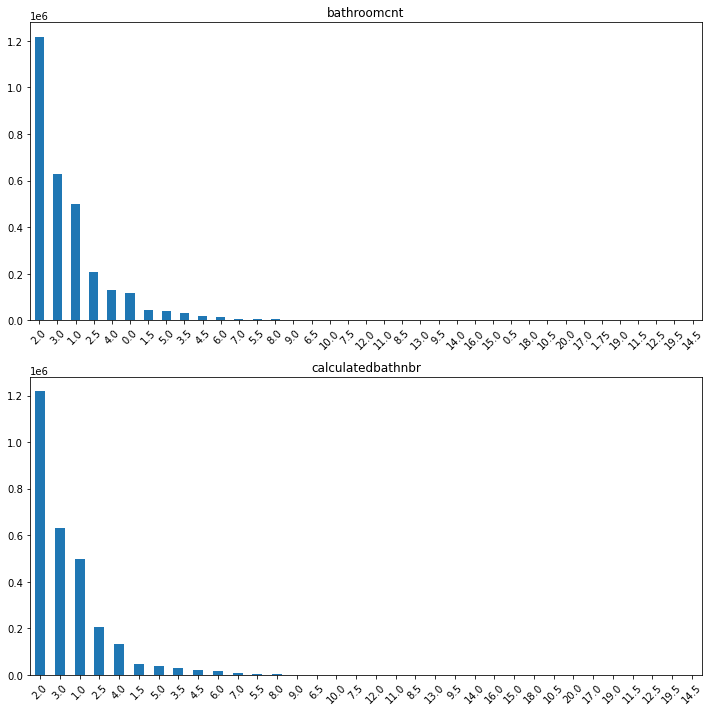

In [22]:
# Plot bar charts for both columns

columns = ['bathroomcnt','calculatedbathnbr']

plt.subplots(figsize = (10, 10))

counter = 0

for col in columns:
    counter +=1
    plt.subplot(2, 1, counter)
    prop_2016[col].value_counts().plot.bar(rot = 45)
    plt.title(columns[counter - 1])
    
plt.tight_layout();

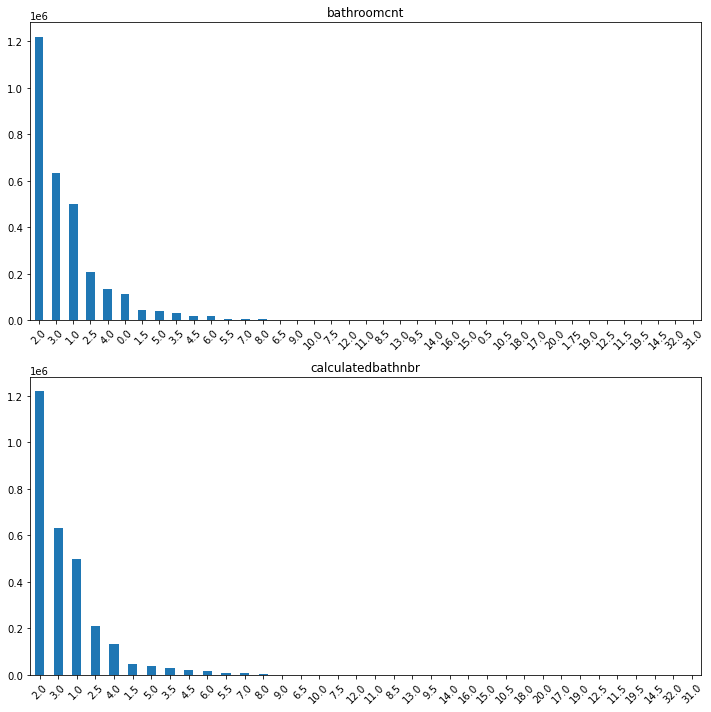

In [23]:
# Plot bar charts for both columns

columns = ['bathroomcnt','calculatedbathnbr']

plt.subplots(figsize = (10, 10))

counter = 0

for col in columns:
    counter +=1
    plt.subplot(2, 1, counter)
    prop_2017[col].value_counts().plot.bar(rot = 45)
    plt.title(columns[counter - 1])
    
plt.tight_layout();

- The distributions and the shape of the graphs show that <b>both columns contain the same set of data. Thus, one of them should be removed.</b>
- In this cases, `calculatedbathnbr` will be removed.

#### Column Removal

- According to the observations above, some columns will be removed from the datasets.
- Also, columns with high percentage of missing values and irrelevant columns will be removed from the datasets too.

In [24]:
list(prop_2016.columns)

['parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'firep

In [25]:
list(prop_2017.columns)

['parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'firep

In [51]:
# Remove some columns from prop_2016
# axis = 1: the columns are being removed, not the rows
# inplace = True: the operation would work on the original object

prop_2016.drop(['airconditioningtypeid',
                'architecturalstyletypeid',
                'basementsqft',
                'buildingclasstypeid',
                'calculatedbathnbr',
                'decktypeid',
                'finishedfloor1squarefeet',
                'finishedsquarefeet13',
                'finishedsquarefeet15',
                'finishedsquarefeet50',
                'finishedsquarefeet6',
                'fips',
                'fireplacecnt',
                'fireplaceflag',
                'garagecarcnt',
                'garagetotalsqft',
                'hashottuborspa',
                'heatingorsystemtypeid',
                'poolcnt',
                'poolsizesum',
                'pooltypeid10',
                'pooltypeid2',
                'pooltypeid7',
                'propertycountylandusecode',
                'propertyzoningdesc',
                'rawcensustractandblock',
                'censustractandblock',
                'regionidneighborhood',
                'storytypeid',
                'threequarterbathnbr',
                'typeconstructiontypeid',
                'yardbuildingsqft17',
                'yardbuildingsqft26',
                'numberofstories',
                'taxdelinquencyflag',
                'taxdelinquencyyear'],axis = 1, inplace = True)

In [54]:
# Remove some columns from prop_2017
# axis = 1: the columns are being removed, not the rows
# inplace = True: the operation would work on the original object

prop_2017.drop(['airconditioningtypeid',
                'architecturalstyletypeid',
                'basementsqft',
                'buildingclasstypeid',
                'calculatedbathnbr',
                'decktypeid',
                'finishedfloor1squarefeet',
                'finishedsquarefeet13',
                'finishedsquarefeet15',
                'finishedsquarefeet50',
                'finishedsquarefeet6',
                'fips',
                'fireplacecnt',
                'fireplaceflag',
                'garagecarcnt',
                'garagetotalsqft',
                'hashottuborspa',
                'heatingorsystemtypeid',
                'poolcnt',
                'poolsizesum',
                'pooltypeid10',
                'pooltypeid2',
                'pooltypeid7',
                'propertycountylandusecode',
                'propertyzoningdesc',
                'rawcensustractandblock',
                'censustractandblock',
                'regionidneighborhood',
                'storytypeid',
                'threequarterbathnbr',
                'typeconstructiontypeid',
                'yardbuildingsqft17',
                'yardbuildingsqft26',
                'numberofstories',
                'taxdelinquencyflag',
                'taxdelinquencyyear'],axis = 1, inplace = True)

In [52]:
# Shape of the updated dataset

prop_2016.shape

(2985217, 22)

In [55]:
# Shape of the updated dataset

prop_2017.shape

(2985217, 22)

- After removing 36 columns, the updated datasets now have <b>2,985,217 rows and 22 columns.</b>

In [56]:
# View the updated dataset

prop_2016.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,10754147,0.0,0.0,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,...,3101.0,96337.0,0.0,NaN,NaN,NaN,9.0,2015.0,9.0,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,...,3101.0,96337.0,0.0,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,NaN,33989359.0,-118394633.0,63085.0,...,3101.0,96095.0,0.0,2.0,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37
3,10859147,0.0,0.0,7.0,5068.0,NaN,NaN,34148863.0,-118437206.0,7521.0,...,3101.0,96424.0,0.0,NaN,1948.0,571346.0,1156834.0,2015.0,585488.0,14557.57
4,10879947,0.0,0.0,NaN,1776.0,NaN,NaN,34194168.0,-118385816.0,8512.0,...,3101.0,96450.0,0.0,1.0,1947.0,193796.0,433491.0,2015.0,239695.0,5725.17


In [57]:
# View the updated dataset

prop_2017.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,10754147,0.0,0.0,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,...,3101.0,96337.0,0.0,NaN,NaN,NaN,9.0,2016.0,9.0,NaN
1,10759547,0.0,0.0,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,...,3101.0,96337.0,0.0,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN
2,10843547,0.0,0.0,NaN,73026.0,NaN,NaN,33989359.0,-118394633.0,63085.0,...,3101.0,96095.0,0.0,2.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37
3,10859147,0.0,0.0,6.0,5068.0,NaN,NaN,34148863.0,-118437206.0,7521.0,...,3101.0,96424.0,0.0,NaN,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57
4,10879947,0.0,0.0,NaN,1776.0,NaN,NaN,34194168.0,-118385816.0,8512.0,...,3101.0,96450.0,0.0,1.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17


In [58]:
# Check the data types

prop_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 22 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bathroomcnt                   float64
 2   bedroomcnt                    float64
 3   buildingqualitytypeid         float64
 4   calculatedfinishedsquarefeet  float64
 5   finishedsquarefeet12          float64
 6   fullbathcnt                   float64
 7   latitude                      float64
 8   longitude                     float64
 9   lotsizesquarefeet             float64
 10  propertylandusetypeid         float64
 11  regionidcity                  float64
 12  regionidcounty                float64
 13  regionidzip                   float64
 14  roomcnt                       float64
 15  unitcnt                       float64
 16  yearbuilt                     float64
 17  structuretaxvaluedollarcnt    float64
 18  taxvaluedollarcnt     

In [59]:
# Check the data types

prop_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 22 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   bathroomcnt                   float64
 2   bedroomcnt                    float64
 3   buildingqualitytypeid         float64
 4   calculatedfinishedsquarefeet  float64
 5   finishedsquarefeet12          float64
 6   fullbathcnt                   float64
 7   latitude                      float64
 8   longitude                     float64
 9   lotsizesquarefeet             float64
 10  propertylandusetypeid         float64
 11  regionidcity                  float64
 12  regionidcounty                float64
 13  regionidzip                   float64
 14  roomcnt                       float64
 15  unitcnt                       float64
 16  yearbuilt                     float64
 17  structuretaxvaluedollarcnt    float64
 18  taxvaluedollarcnt     

- There are 21 columns with `float64` and 1 column with `int64` data type.

In [61]:
# Print out rows and columns of the dataframes

print(f"There are {prop_2016.shape[0]} rows and {prop_2016.shape[1]} columns in 'prop_2016'.")
print(f"There are {prop_2017.shape[0]} rows and {prop_2017.shape[1]} columns in 'prop_2017'.")

There are 2985217 rows and 22 columns in 'prop_2016'.
There are 2985217 rows and 22 columns in 'prop_2017'.


- <b>36 columns were dropped</b> from each dataset.

#### Replace 0 with NaN

In order to prepare the datasets for KNN Imputer in the next step, the value 0 needs to be replaced with NaN to avoid errors.

There are 3 columns containing 0 including `bathroomcnt`, `bedroomcnt`, and `roomcnt`.

In [77]:
# Replace 0 with NaN

prop_2016['bathroomcnt'].replace(0, np.nan, inplace = True)
prop_2016['bedroomcnt'].replace(0, np.nan, inplace = True)
prop_2016['roomcnt'].replace(0, np.nan, inplace = True)

In [81]:
# Replace 0 with NaN

prop_2017['bathroomcnt'].replace(0, np.nan, inplace = True)
prop_2017['bedroomcnt'].replace(0, np.nan, inplace = True)
prop_2017['roomcnt'].replace(0, np.nan, inplace = True)

In [78]:
# Check the unique values in the column

prop_2016['bathroomcnt'].unique()

array([  nan,  2.  ,  4.  ,  3.  ,  1.  ,  2.5 ,  3.5 ,  5.  ,  1.5 ,
        4.5 ,  7.5 ,  5.5 ,  6.  ,  7.  , 10.  ,  8.  ,  9.  , 12.  ,
       11.  ,  8.5 ,  6.5 , 13.  ,  9.5 , 14.  , 20.  , 19.5 , 15.  ,
       10.5 , 18.  , 16.  ,  1.75, 17.  , 19.  ,  0.5 , 12.5 , 11.5 ,
       14.5 ])

In [82]:
# Check the unique values in the column

prop_2017['bathroomcnt'].unique()

array([  nan,  4.  ,  2.  ,  3.  ,  1.  ,  2.5 ,  3.5 ,  5.5 ,  4.5 ,
        5.  ,  1.5 ,  7.5 ,  6.  ,  7.  , 10.  ,  8.  ,  9.  , 12.  ,
       11.  ,  8.5 ,  6.5 , 13.  ,  9.5 , 14.  , 20.  , 19.5 , 10.5 ,
       15.  , 18.  , 16.  ,  1.75, 17.  , 19.  ,  0.5 , 12.5 , 11.5 ,
       14.5 , 32.  , 31.  ])

In [79]:
# Check the unique values in the column

prop_2016['bedroomcnt'].unique()

array([nan,  4.,  5.,  2.,  3.,  1.,  6.,  7.,  8., 12., 11.,  9., 10.,
       14., 16., 13., 15., 17., 18., 20., 19.])

In [83]:
# Check the unique values in the column

prop_2017['bedroomcnt'].unique()

array([nan,  4.,  5.,  2.,  3.,  1.,  6.,  7.,  8., 12., 11.,  9., 10.,
       14., 16., 25., 13., 15., 17., 18., 20., 23., 19., 24., 21.])

In [76]:
# Check the unique values in the column

prop_2016['roomcnt'].unique()

array([nan,  8.,  4.,  5.,  7.,  6., 11.,  3., 10.,  9.,  2., 12., 86.,
       13., 15., 18., 22., 14.,  1., 19., 21., 30., 16., 67., 56., 42.,
       17., 24., 84., 20., 31., 77., 40., 52., 96., 45.])

In [84]:
# Check the amount of data in each code

prop_2017['roomcnt'].unique()

array([nan,  4.,  8.,  5.,  7.,  6., 11.,  3., 10.,  9.,  2., 12., 86.,
       13., 15., 18., 22., 14.,  1., 19., 17., 21., 30., 16., 67., 56.,
       42., 24., 84., 20., 31., 77., 40., 52., 96., 45.])

- At this point, NaN is now one of the unique values in the selected columns

In [136]:
# View the updated dataset

prop_2016.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,10754147,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN
1,10759547,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN
2,10843547,NaN,NaN,NaN,73026.0,NaN,NaN,33989359.0,-118394633.0,63085.0,...,3101.0,96095.0,NaN,2.0,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37
3,10859147,NaN,NaN,7.0,5068.0,NaN,NaN,34148863.0,-118437206.0,7521.0,...,3101.0,96424.0,NaN,NaN,1948.0,571346.0,1156834.0,2015.0,585488.0,14557.57
4,10879947,NaN,NaN,NaN,1776.0,NaN,NaN,34194168.0,-118385816.0,8512.0,...,3101.0,96450.0,NaN,1.0,1947.0,193796.0,433491.0,2015.0,239695.0,5725.17


In [137]:
# View the updated dataset

prop_2017.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,10754147,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN
1,10759547,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN
2,10843547,NaN,NaN,NaN,73026.0,NaN,NaN,33989359.0,-118394633.0,63085.0,...,3101.0,96095.0,NaN,2.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37
3,10859147,NaN,NaN,6.0,5068.0,NaN,NaN,34148863.0,-118437206.0,7521.0,...,3101.0,96424.0,NaN,NaN,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57
4,10879947,NaN,NaN,NaN,1776.0,NaN,NaN,34194168.0,-118385816.0,8512.0,...,3101.0,96450.0,NaN,1.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17


In [139]:
# Export a cleaned dataframe to a .csv file

prop_2016.to_csv(r'prop_2016_new.csv', index = False, header = True)

In [140]:
# Export a cleaned dataframe to a .csv file

prop_2017.to_csv(r'prop_2017_new.csv', index = False, header = True)

In [142]:
# Read in the dataset

prop_2016_new = pd.read_csv('prop_2016_new.csv')

In [145]:
# Read in the dataset

prop_2017_new = pd.read_csv('prop_2017_new.csv')

In [143]:
# Shape of the dataset

prop_2016_new.shape

(2985217, 22)

In [146]:
# Shape of the dataset

prop_2017_new.shape

(2985217, 22)

In [144]:
# View the dataset

prop_2016_new.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,10754147,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN
1,10759547,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN
2,10843547,NaN,NaN,NaN,73026.0,NaN,NaN,33989359.0,-118394633.0,63085.0,...,3101.0,96095.0,NaN,2.0,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37
3,10859147,NaN,NaN,7.0,5068.0,NaN,NaN,34148863.0,-118437206.0,7521.0,...,3101.0,96424.0,NaN,NaN,1948.0,571346.0,1156834.0,2015.0,585488.0,14557.57
4,10879947,NaN,NaN,NaN,1776.0,NaN,NaN,34194168.0,-118385816.0,8512.0,...,3101.0,96450.0,NaN,1.0,1947.0,193796.0,433491.0,2015.0,239695.0,5725.17


In [147]:
# View the dataset

prop_2017_new.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,10754147,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,9.0,2016.0,9.0,NaN
1,10759547,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,...,3101.0,96337.0,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN
2,10843547,NaN,NaN,NaN,73026.0,NaN,NaN,33989359.0,-118394633.0,63085.0,...,3101.0,96095.0,NaN,2.0,1959.0,660680.0,1434941.0,2016.0,774261.0,20800.37
3,10859147,NaN,NaN,6.0,5068.0,NaN,NaN,34148863.0,-118437206.0,7521.0,...,3101.0,96424.0,NaN,NaN,1948.0,580059.0,1174475.0,2016.0,594416.0,14557.57
4,10879947,NaN,NaN,NaN,1776.0,NaN,NaN,34194168.0,-118385816.0,8512.0,...,3101.0,96450.0,NaN,1.0,1947.0,196751.0,440101.0,2016.0,243350.0,5725.17


#### Replace NaN or missing values with KNN Imputer

In this case, it is more accurate to replace the missing values with KNN Imputer instead of mean or median.

For example, the missing values in amount of rooms or zip code columns should not be filled with the mean or the median of the columns. Instead, it should be filled by the value with similar features

KNN Imputer replaces a datapoint's missing value with the average value for that feature from the closest points in the dataset.

In [148]:
# Calculate the proportion of missing values in prop_2016

(prop_2016.isna().sum() / prop_2016.shape[0]) * 100

parcelid                         0.000000
bathroomcnt                      4.290341
bedroomcnt                       4.452474
buildingqualitytypeid           35.063749
calculatedfinishedsquarefeet     1.861339
finishedsquarefeet12             9.246664
fullbathcnt                      4.318346
latitude                         0.383121
longitude                        0.383121
lotsizesquarefeet                9.248875
propertylandusetypeid            0.383121
regionidcity                     2.105207
regionidcounty                   0.383121
regionidzip                      0.468308
roomcnt                         77.728152
unitcnt                         33.757244
yearbuilt                        2.007492
structuretaxvaluedollarcnt       1.841809
taxvaluedollarcnt                1.425357
assessmentyear                   0.383188
landtaxvaluedollarcnt            2.268947
taxamount                        1.046825
dtype: float64

In [161]:
# Calculate the proportion of missing values in prop_2017

(prop_2017.isna().sum() / prop_2017.shape[0]) * 100

parcelid                         0.000000
bathroomcnt                      3.900118
bedroomcnt                       4.075081
buildingqualitytypeid           34.966369
calculatedfinishedsquarefeet     1.510677
finishedsquarefeet12             8.858016
fullbathcnt                      3.924539
latitude                         0.098217
longitude                        0.098217
lotsizesquarefeet                9.135215
propertylandusetypeid            0.098217
regionidcity                     2.081189
regionidcounty                   0.098217
regionidzip                      0.425899
roomcnt                         77.669831
unitcnt                         33.638258
yearbuilt                        1.602329
structuretaxvaluedollarcnt       1.556470
taxvaluedollarcnt                1.147856
assessmentyear                   0.098251
landtaxvaluedollarcnt            2.007425
taxamount                        0.762156
dtype: float64

- There are missing values in every column of both datasets, except `parcelid` which is an id column.

#### Fill missing values using KKN Imputer

From this point, only 1% of the dataset will be taken as a sample dataset because the original dataset is too big. Also, the sample dataset would take less run time compared to the original one.

In [149]:
# Take 1% as a sample from the dataset

prop_2016_sample = prop_2016.sample(frac = 0.01)

In [162]:
# Take 1% as a sample from the dataset

prop_2017_sample = prop_2017.sample(frac = 0.01)

In [150]:
# Shape of the sample dataset

prop_2016_sample.shape

(29852, 22)

In [163]:
# Shape of the sample dataset

prop_2017_sample.shape

(29852, 22)

- The sample dataset has <b>29,852 rows and 22 columns.</b>

In [151]:
# Scale the data using StandardScaler

scaler = StandardScaler()
prop_2016_scaled = scaler.fit_transform(prop_2016_sample)

In [164]:
# Scale the data using StandardScaler

scaler = StandardScaler()
prop_2017_scaled = scaler.fit_transform(prop_2017_sample)

In [152]:
# View the scaled dataset

prop_2016_scaled

array([[ 0.09559664,  1.19309493,  2.4588338 , ...,  0.02320293,
         0.95283904,  0.57235793],
       [-0.14743264, -0.30202418,  0.68534663, ...,  0.02320293,
         1.59230704,  1.30065385],
       [-0.03234549,  0.69472189,  0.68534663, ...,  0.02320293,
        -0.37955555, -0.10311714],
       ...,
       [-0.22962339, -1.29877024, -0.20139695, ...,  0.02320293,
         0.58501088,  0.33251024],
       [-0.04514452, -0.30202418, -0.20139695, ...,  0.02320293,
        -0.24329441,  0.09095066],
       [-0.19866607,  0.69472189,  1.57209022, ...,  0.02320293,
         0.62355275,  0.49924084]])

In [165]:
# View the scaled dataset

prop_2017_scaled

array([[-0.17707554, -0.30533818, -0.19902826, ...,  0.0337383 ,
        -0.04458653, -0.10444716],
       [-0.04316219, -0.30533818, -0.19902826, ...,  0.0337383 ,
         0.07858531, -0.09924941],
       [ 0.18007844, -0.30533818, -1.08417537, ...,  0.0337383 ,
        -0.53623877, -0.56585495],
       ...,
       [ 0.1371109 ,  0.19529917,  0.68611886, ...,  0.0337383 ,
         0.55954383,  0.21504663],
       [-0.02565754,  2.69848593,  0.68611886, ...,  0.0337383 ,
         0.62186521,  1.88325718],
       [ 0.17798039, -0.30533818, -1.08417537, ...,  0.0337383 ,
        -0.38944133, -0.35067741]])

In [153]:
from sklearn.impute import KNNImputer

# KNN based imputation
# n_neighbors = 2 means that the new value would be based on the two neighbor values

imputer = KNNImputer(n_neighbors = 2)
prop_2016_filled = imputer.fit_transform(prop_2016_scaled)

In [166]:
# KNN based imputation
# n_neighbors = 2 means that the new value would be based on the two neighbor values

imputer = KNNImputer(n_neighbors = 2)
prop_2017_filled = imputer.fit_transform(prop_2017_scaled)

In [154]:
# View the filled array

prop_2016_filled

array([[ 0.09559664,  1.19309493,  2.4588338 , ...,  0.02320293,
         0.95283904,  0.57235793],
       [-0.14743264, -0.30202418,  0.68534663, ...,  0.02320293,
         1.59230704,  1.30065385],
       [-0.03234549,  0.69472189,  0.68534663, ...,  0.02320293,
        -0.37955555, -0.10311714],
       ...,
       [-0.22962339, -1.29877024, -0.20139695, ...,  0.02320293,
         0.58501088,  0.33251024],
       [-0.04514452, -0.30202418, -0.20139695, ...,  0.02320293,
        -0.24329441,  0.09095066],
       [-0.19866607,  0.69472189,  1.57209022, ...,  0.02320293,
         0.62355275,  0.49924084]])

In [167]:
# View the filled array

prop_2017_filled

array([[-0.17707554, -0.30533818, -0.19902826, ...,  0.0337383 ,
        -0.04458653, -0.10444716],
       [-0.04316219, -0.30533818, -0.19902826, ...,  0.0337383 ,
         0.07858531, -0.09924941],
       [ 0.18007844, -0.30533818, -1.08417537, ...,  0.0337383 ,
        -0.53623877, -0.56585495],
       ...,
       [ 0.1371109 ,  0.19529917,  0.68611886, ...,  0.0337383 ,
         0.55954383,  0.21504663],
       [-0.02565754,  2.69848593,  0.68611886, ...,  0.0337383 ,
         0.62186521,  1.88325718],
       [ 0.17798039, -0.30533818, -1.08417537, ...,  0.0337383 ,
        -0.38944133, -0.35067741]])

In [155]:
# Inverse transform the array

prop_2016_filled = scaler.inverse_transform(prop_2016_filled)

In [168]:
# Inverse transform the array

prop_2017_filled = scaler.inverse_transform(prop_2017_filled)

In [156]:
# View the inversed array

prop_2016_filled

array([[1.4165040e+07, 3.5000000e+00, 6.0000000e+00, ..., 2.0150000e+03,
        6.4656800e+05, 9.5761800e+03],
       [1.2144802e+07, 2.0000000e+00, 4.0000000e+00, ..., 2.0150000e+03,
        9.1180000e+05, 1.4923870e+04],
       [1.3101491e+07, 3.0000000e+00, 4.0000000e+00, ..., 2.0150000e+03,
        9.3931000e+04, 4.6163400e+03],
       ...,
       [1.1461572e+07, 1.0000000e+00, 3.0000000e+00, ..., 2.0150000e+03,
        4.9400400e+05, 7.8150400e+03],
       [1.2995096e+07, 2.0000000e+00, 3.0000000e+00, ..., 2.0150000e+03,
        1.5044800e+05, 6.0413300e+03],
       [1.1718912e+07, 3.0000000e+00, 5.0000000e+00, ..., 2.0150000e+03,
        5.0999000e+05, 9.0393000e+03]])

In [169]:
# View the inversed array

prop_2017_filled

array([[1.1965980e+07, 2.0000000e+00, 3.0000000e+00, ..., 2.0160000e+03,
        2.5031300e+05, 4.6399000e+03],
       [1.2962138e+07, 2.0000000e+00, 3.0000000e+00, ..., 2.0160000e+03,
        3.0457500e+05, 4.6787500e+03],
       [1.4622786e+07, 2.0000000e+00, 2.0000000e+00, ..., 2.0160000e+03,
        3.3721000e+04, 1.1911600e+03],
       ...,
       [1.4303158e+07, 2.5000000e+00, 4.0000000e+00, ..., 2.0160000e+03,
        5.1645600e+05, 7.0279200e+03],
       [1.3092352e+07, 5.0000000e+00, 4.0000000e+00, ..., 2.0160000e+03,
        5.4391100e+05, 1.9496770e+04],
       [1.4607179e+07, 2.0000000e+00, 2.0000000e+00, ..., 2.0160000e+03,
        9.8391000e+04, 2.7994800e+03]])

#### Convert the array back to the dataframe

In [128]:
list(prop_2016.columns)

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount']

In [129]:
list(prop_2017.columns)

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount']

In [157]:
prop_2016_df = pd.DataFrame(prop_2016_filled, columns = ['parcelid',
                                                         'bathroomcnt',
                                                         'bedroomcnt',
                                                         'buildingqualitytypeid',
                                                         'calculatedfinishedsquarefeet',
                                                         'finishedsquarefeet12',
                                                         'fullbathcnt',
                                                         'latitude',
                                                         'longitude',
                                                         'lotsizesquarefeet',
                                                         'propertylandusetypeid',
                                                         'regionidcity',
                                                         'regionidcounty',
                                                         'regionidzip',
                                                         'roomcnt',
                                                         'unitcnt',
                                                         'yearbuilt',
                                                         'structuretaxvaluedollarcnt',
                                                         'taxvaluedollarcnt',
                                                         'assessmentyear',
                                                         'landtaxvaluedollarcnt',
                                                         'taxamount'])

In [170]:
prop_2017_df = pd.DataFrame(prop_2017_filled, columns = ['parcelid',
                                                         'bathroomcnt',
                                                         'bedroomcnt',
                                                         'buildingqualitytypeid',
                                                         'calculatedfinishedsquarefeet',
                                                         'finishedsquarefeet12',
                                                         'fullbathcnt',
                                                         'latitude',
                                                         'longitude',
                                                         'lotsizesquarefeet',
                                                         'propertylandusetypeid',
                                                         'regionidcity',
                                                         'regionidcounty',
                                                         'regionidzip',
                                                         'roomcnt',
                                                         'unitcnt',
                                                         'yearbuilt',
                                                         'structuretaxvaluedollarcnt',
                                                         'taxvaluedollarcnt',
                                                         'assessmentyear',
                                                         'landtaxvaluedollarcnt',
                                                         'taxamount'])

In [158]:
# Shape of the new dataset

prop_2016_df.shape

(29852, 22)

In [171]:
# Shape of the new dataset

prop_2017_df.shape

(29852, 22)

- The shape of the dataset after filling the missing values with KNN Imputer is still the same, (29852, 22).

In [159]:
prop_2016_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,14165040.0,3.5,6.0,4.0,2774.0,2774.0,3.0,33895719.0,-117810249.0,9120.0,...,1286.0,97078.0,7.0,4.0,1970.0,189508.0,836076.0,2015.0,646568.0,9576.18
1,12144802.0,2.0,4.0,4.0,1818.0,1818.0,2.0,34112701.0,-118049425.0,9917.0,...,3101.0,96268.0,7.0,1.0,1956.0,377159.0,1288959.0,2015.0,911800.0,14923.87
2,13101491.0,3.0,4.0,4.0,2509.0,2509.0,3.0,33983059.0,-117853204.0,13390.0,...,3101.0,96522.0,8.0,1.0,1981.0,281659.0,375590.0,2015.0,93931.0,4616.34
3,13926960.0,2.0,3.0,7.0,1619.0,1619.0,2.0,33793770.0,-118078964.0,7700.0,...,1286.0,96218.0,5.0,2.0,1959.0,47244.0,77844.0,2015.0,30600.0,1500.44
4,13980106.0,2.5,4.0,7.0,1976.0,1976.0,2.0,33634633.0,-117898743.0,7205.0,...,1286.0,96978.0,7.0,1.5,1954.0,102352.0,854126.0,2015.0,751774.0,9465.60


In [160]:
prop_2016_df.tail()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
29847,13138622.0,3.0,3.0,4.0,1845.0,1845.0,3.0,34430772.0,-118487066.0,361087.0,...,3101.0,96374.0,7.5,1.0,1989.0,120540.0,157071.0,2015.0,36531.0,2368.93
29848,11423464.0,2.0,2.0,7.0,860.0,860.0,2.0,33928701.0,-118338126.0,7565.0,...,3101.0,96107.0,6.0,1.0,1940.0,61198.0,305993.0,2015.0,244795.0,4198.95
29849,11461572.0,1.0,3.0,7.0,1089.0,1089.0,1.0,33960413.0,-118414015.0,4830.0,...,3101.0,96026.0,6.0,1.0,1944.0,145321.0,639325.0,2015.0,494004.0,7815.04
29850,12995096.0,2.0,3.0,7.0,1102.0,1102.0,2.0,34077357.0,-118028580.0,5351.0,...,3101.0,96478.0,6.0,1.0,1951.0,101922.0,252370.0,2015.0,150448.0,6041.33
29851,11718912.0,3.0,5.0,7.0,3347.0,2745.0,3.0,34026392.0,-118297909.0,6615.0,...,3101.0,95988.0,8.5,3.0,1922.0,209095.0,719085.0,2015.0,509990.0,9039.30


In [172]:
prop_2017_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,11965980.0,2.0,3.0,8.0,2260.0,2260.0,2.0,34104608.0,-118198370.0,7078.0,...,3101.0,96023.0,6.5,1.0,1924.0,104477.0,354790.0,2016.0,250313.0,4639.90
1,12962138.0,2.0,3.0,6.0,1330.0,1330.0,2.0,34121609.0,-118002629.0,8960.0,...,3101.0,96273.0,6.0,1.0,1948.0,76143.0,380718.0,2016.0,304575.0,4678.75
2,14622786.0,2.0,2.0,7.0,1199.0,1199.0,2.0,33619500.0,-117722000.0,3994.5,...,1286.0,96963.0,5.0,2.5,1970.0,80450.0,114171.0,2016.0,33721.0,1191.16
3,13901007.0,1.0,2.0,4.0,1193.0,1193.0,1.0,33875880.0,-117994278.0,6750.0,...,1286.0,96181.0,4.0,2.0,1954.0,67929.0,231861.0,2016.0,163932.0,2810.72
4,11191041.0,3.0,4.0,7.0,2924.0,2924.0,3.0,34597930.0,-118178987.0,7585.0,...,3101.0,97329.0,8.0,1.0,2003.0,258900.0,323000.0,2016.0,64100.0,4967.48


In [173]:
prop_2017_df.tail()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
29847,14531293.0,1.0,1.0,7.0,764.0,764.0,1.0,33494800.0,-117670000.0,2780.0,...,1286.0,96985.0,3.0,2.5,1979.0,86329.0,119657.0,2016.0,33328.0,1268.38
29848,12285311.0,1.0,3.0,4.0,1020.0,1020.0,1.0,33908890.0,-118203218.0,6664.0,...,3101.0,96091.0,5.5,1.0,1947.0,49187.0,245938.0,2016.0,196751.0,4934.75
29849,14303158.0,2.5,4.0,8.0,1897.0,1897.0,2.0,33709455.0,-117794904.0,5300.0,...,1286.0,96943.0,8.0,2.0,1974.0,165934.0,682390.0,2016.0,516456.0,7027.92
29850,13092352.0,5.0,4.0,10.0,4498.0,4498.0,5.0,34036177.0,-117879816.0,18313.5,...,3101.0,96522.0,8.0,1.0,2008.0,926825.0,1470736.0,2016.0,543911.0,19496.77
29851,14607179.0,2.0,2.0,7.0,1254.0,1254.0,2.0,33779300.0,-117941000.0,3607.5,...,1286.0,97047.0,4.0,2.5,1980.0,119687.0,218078.0,2016.0,98391.0,2799.48


In [174]:
# View the data type

prop_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  float64
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  float64
 3   buildingqualitytypeid         29852 non-null  float64
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  float64
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  float64
 11  regionidcity                  29852 non-null  float64
 12  regionidcounty                29852 non-null  float64
 13  r

In [175]:
# View the data type

prop_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  float64
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  float64
 3   buildingqualitytypeid         29852 non-null  float64
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  float64
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  float64
 11  regionidcity                  29852 non-null  float64
 12  regionidcounty                29852 non-null  float64
 13  r

- Now the data type of all columns is `float64`.

In [179]:
# Check for any duplicate

prop_2016_df.duplicated().sum()

0

In [180]:
# Check for any duplicate

prop_2017_df.duplicated().sum()

0

- There is no duplicate in both datasets.

In [176]:
# Check for any missing value

prop_2016_df.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
dtype: int64

In [177]:
# Check for any missing value

prop_2017_df.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
dtype: int64

- There is <b>no missing value in both datasets</b> at this point.

#### Add New Columns

New useful columns will be created in hope that they would benefit the models later.

`ageinyear`: age of the properties to the inspection year

In [181]:
# Create a new column called 'ageinyear'

prop_2016_df['ageinyear'] = 2016 - prop_2016_df['yearbuilt']

In [182]:
# Create a new column called 'ageinyear'

prop_2017_df['ageinyear'] = 2017 - prop_2017_df['yearbuilt']

`assessedvalue`:  sum of the assessed value of the built structure on the parcel and the assessed value of the land area of the parcel

In [184]:
# Create a new column called 'assessedvalue'

prop_2016_df['assessedvalue'] = prop_2016_df['structuretaxvaluedollarcnt'] + prop_2016_df['landtaxvaluedollarcnt']

In [187]:
# Create a new column called 'assessedvalue'

prop_2017_df['assessedvalue'] = prop_2017_df['structuretaxvaluedollarcnt'] + prop_2017_df['landtaxvaluedollarcnt']

In [189]:
# View the updated dataset

prop_2016_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040.0,3.5,6.0,4.0,2774.0,2774.0,3.0,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970.0,189508.0,836076.0,2015.0,646568.0,9576.18,46.0,836076.0
1,12144802.0,2.0,4.0,4.0,1818.0,1818.0,2.0,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956.0,377159.0,1288959.0,2015.0,911800.0,14923.87,60.0,1288959.0
2,13101491.0,3.0,4.0,4.0,2509.0,2509.0,3.0,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981.0,281659.0,375590.0,2015.0,93931.0,4616.34,35.0,375590.0
3,13926960.0,2.0,3.0,7.0,1619.0,1619.0,2.0,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959.0,47244.0,77844.0,2015.0,30600.0,1500.44,57.0,77844.0
4,13980106.0,2.5,4.0,7.0,1976.0,1976.0,2.0,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954.0,102352.0,854126.0,2015.0,751774.0,9465.60,62.0,854126.0


In [190]:
# View the updated dataset

prop_2017_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,11965980.0,2.0,3.0,8.0,2260.0,2260.0,2.0,34104608.0,-118198370.0,7078.0,...,6.5,1.0,1924.0,104477.0,354790.0,2016.0,250313.0,4639.90,93.0,354790.0
1,12962138.0,2.0,3.0,6.0,1330.0,1330.0,2.0,34121609.0,-118002629.0,8960.0,...,6.0,1.0,1948.0,76143.0,380718.0,2016.0,304575.0,4678.75,69.0,380718.0
2,14622786.0,2.0,2.0,7.0,1199.0,1199.0,2.0,33619500.0,-117722000.0,3994.5,...,5.0,2.5,1970.0,80450.0,114171.0,2016.0,33721.0,1191.16,47.0,114171.0
3,13901007.0,1.0,2.0,4.0,1193.0,1193.0,1.0,33875880.0,-117994278.0,6750.0,...,4.0,2.0,1954.0,67929.0,231861.0,2016.0,163932.0,2810.72,63.0,231861.0
4,11191041.0,3.0,4.0,7.0,2924.0,2924.0,3.0,34597930.0,-118178987.0,7585.0,...,8.0,1.0,2003.0,258900.0,323000.0,2016.0,64100.0,4967.48,14.0,323000.0


In [192]:
# Print out rows and columns of the dataframes

print(f"There are {prop_2016_df.shape[0]} rows and {prop_2016_df.shape[1]} columns in 'prop_2016_df'.")
print(f"There are {prop_2017_df.shape[0]} rows and {prop_2017_df.shape[1]} columns in 'prop_2017_df'.")

There are 29852 rows and 24 columns in 'prop_2016_df'.
There are 29852 rows and 24 columns in 'prop_2017_df'.


#### Convert data types

There are 24 columns with `float64` data type. However, some columns should be converted to `int64` for a better format.

In [193]:
# Overview of the dataset

prop_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  float64
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  float64
 3   buildingqualitytypeid         29852 non-null  float64
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  float64
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  float64
 11  regionidcity                  29852 non-null  float64
 12  regionidcounty                29852 non-null  float64
 13  r

In [194]:
# Overview of the dataset

prop_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  float64
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  float64
 3   buildingqualitytypeid         29852 non-null  float64
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  float64
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  float64
 11  regionidcity                  29852 non-null  float64
 12  regionidcounty                29852 non-null  float64
 13  r

In [195]:
# Convert the data type of these columns to `int64`

prop_2016_df[['parcelid',
              'bedroomcnt',
              'buildingqualitytypeid',
              'fullbathcnt',
              'propertylandusetypeid',
              'regionidcity',
              'regionidcounty',
              'regionidzip',
              'yearbuilt',
              'assessmentyear',
              'ageinyear']] = prop_2016_df[['parcelid',
                                            'bedroomcnt',
                                            'buildingqualitytypeid',
                                            'fullbathcnt',
                                            'propertylandusetypeid',
                                            'regionidcity',
                                            'regionidcounty',
                                            'regionidzip',
                                            'yearbuilt',
                                            'assessmentyear',
                                            'ageinyear']].astype('int64')

In [199]:
# Convert the data type of these columns to `int64`

prop_2017_df[['parcelid',
              'bedroomcnt',
              'buildingqualitytypeid',
              'fullbathcnt',
              'propertylandusetypeid',
              'regionidcity',
              'regionidcounty',
              'regionidzip',
              'yearbuilt',
              'assessmentyear',
              'ageinyear']] = prop_2017_df[['parcelid',
                                            'bedroomcnt',
                                            'buildingqualitytypeid',
                                            'fullbathcnt',
                                            'propertylandusetypeid',
                                            'regionidcity',
                                            'regionidcounty',
                                            'regionidzip',
                                            'yearbuilt',
                                            'assessmentyear',
                                            'ageinyear']].astype('int64')

In [196]:
# View the updated data type

prop_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  int64  
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  int64  
 3   buildingqualitytypeid         29852 non-null  int64  
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  int64  
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  int64  
 11  regionidcity                  29852 non-null  int64  
 12  regionidcounty                29852 non-null  int64  
 13  r

In [200]:
# View the updated data type

prop_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  int64  
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  int64  
 3   buildingqualitytypeid         29852 non-null  int64  
 4   calculatedfinishedsquarefeet  29852 non-null  float64
 5   finishedsquarefeet12          29852 non-null  float64
 6   fullbathcnt                   29852 non-null  int64  
 7   latitude                      29852 non-null  float64
 8   longitude                     29852 non-null  float64
 9   lotsizesquarefeet             29852 non-null  float64
 10  propertylandusetypeid         29852 non-null  int64  
 11  regionidcity                  29852 non-null  int64  
 12  regionidcounty                29852 non-null  int64  
 13  r

- Now there are <b>13 `float64` and 11 `int64` columns</b> in each dataset.

In [198]:
# View the updated dataset

prop_2016_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


In [201]:
# View the updated dataset

prop_2017_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,11965980,2.0,3,8,2260.0,2260.0,2,34104608.0,-118198370.0,7078.0,...,6.5,1.0,1924,104477.0,354790.0,2016,250313.0,4639.90,93,354790.0
1,12962138,2.0,3,6,1330.0,1330.0,2,34121609.0,-118002629.0,8960.0,...,6.0,1.0,1948,76143.0,380718.0,2016,304575.0,4678.75,69,380718.0
2,14622786,2.0,2,7,1199.0,1199.0,2,33619500.0,-117722000.0,3994.5,...,5.0,2.5,1970,80450.0,114171.0,2016,33721.0,1191.16,47,114171.0
3,13901007,1.0,2,4,1193.0,1193.0,1,33875880.0,-117994278.0,6750.0,...,4.0,2.0,1954,67929.0,231861.0,2016,163932.0,2810.72,63,231861.0
4,11191041,3.0,4,7,2924.0,2924.0,3,34597930.0,-118178987.0,7585.0,...,8.0,1.0,2003,258900.0,323000.0,2016,64100.0,4967.48,14,323000.0


#### (Optional) Export a cleaned dataframe to a .csv file

In case there is an error later, there is no need to run the codes from the beginning of the notebook.

In [204]:
# Export a cleaned dataframe to a .csv file

prop_2016_df.to_csv(r'prop_2016_cleaned.csv', index = False, header = True)

In [211]:
# Export a cleaned dataframe to a .csv file

prop_2017_df.to_csv(r'prop_2017_cleaned.csv', index = False, header = True)

#### Check the exported data

In [208]:
prop_2016_cleaned = pd.read_csv('prop_2016_cleaned.csv')

In [209]:
prop_2016_cleaned.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
0,14165040,3.5,6,4,2774.0,2774.0,3,33895719.0,-117810249.0,9120.0,...,7.0,4.0,1970,189508.0,836076.0,2015,646568.0,9576.18,46,836076.0
1,12144802,2.0,4,4,1818.0,1818.0,2,34112701.0,-118049425.0,9917.0,...,7.0,1.0,1956,377159.0,1288959.0,2015,911800.0,14923.87,60,1288959.0
2,13101491,3.0,4,4,2509.0,2509.0,3,33983059.0,-117853204.0,13390.0,...,8.0,1.0,1981,281659.0,375590.0,2015,93931.0,4616.34,35,375590.0
3,13926960,2.0,3,7,1619.0,1619.0,2,33793770.0,-118078964.0,7700.0,...,5.0,2.0,1959,47244.0,77844.0,2015,30600.0,1500.44,57,77844.0
4,13980106,2.5,4,7,1976.0,1976.0,2,33634633.0,-117898743.0,7205.0,...,7.0,1.5,1954,102352.0,854126.0,2015,751774.0,9465.60,62,854126.0


In [92]:
# Check for any duplicate

prop_2016_cleaned.duplicated().sum()

0

In [93]:
# Check for any missing value

prop_2016_cleaned.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
dtype: int64

In [95]:
prop_2016_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29852 entries, 0 to 29851
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      29852 non-null  float64
 1   bathroomcnt                   29852 non-null  float64
 2   bedroomcnt                    29852 non-null  float64
 3   buildingqualitytypeid         29852 non-null  float64
 4   calculatedbathnbr             29852 non-null  float64
 5   calculatedfinishedsquarefeet  29852 non-null  float64
 6   finishedsquarefeet12          29852 non-null  float64
 7   fips                          29852 non-null  float64
 8   fullbathcnt                   29852 non-null  float64
 9   latitude                      29852 non-null  float64
 10  longitude                     29852 non-null  float64
 11  lotsizesquarefeet             29852 non-null  float64
 12  propertylandusetypeid         29852 non-null  float64
 13  r

## The infomation below is only used for the first presentation

- please ignore

#### Numeric vs. Non-numeric Columns

Both datasets have a mix of numeric and non-numeric columns as follows:

|**Numeric**                    |**Non-numeric**                |
|:------------------------------|------------------------------:|
|bathroomcnt|parcelid|
|bedroomcnt|buildingqualitytypeid|
|calculatedbathnbr|fips|
|finishedsquarefeet12|propertycountylandusecode|
|fullbathcnt|propertylandusetypeid|
|latitude|propertyzoningdesc|
|longitude|rawcensustractandblock|
|lotsizesquarefeet|regionidcity|
|roomcnt|regionidcounty|
|unitcnt|regionidzip|
|structuretaxvaluedollarcnt|yearbuilt|
|taxvaluedollarcnt|assessmentyear|
|landtaxvaluedollarcnt|censustractandblock|
|taxamount||
|ageinyear||
|assessedvalue||


There are <b>16 numeric and 13 non-numeric columns</b> in total.

In [57]:
# Assign numeric columns

numeric_2016 = prop_2016[['bathroomcnt',
                         'bedroomcnt',
                         'finishedsquarefeet12',
                         'fullbathcnt',
                         'latitude',
                         'longitude',
                         'lotsizesquarefeet',
                         'roomcnt',
                         'unitcnt',
                         'structuretaxvaluedollarcnt',
                         'taxvaluedollarcnt',
                         'landtaxvaluedollarcnt',
                         'taxamount',
                         'ageinyear',
                         'assessedvalue']]

In [12]:
# Assign numeric columns

numeric_2017 = prop_2017[['bathroomcnt',
                         'bedroomcnt',
                         'calculatedbathnbr',
                         'finishedsquarefeet12',
                         'fullbathcnt',
                         'latitude',
                         'longitude',
                         'lotsizesquarefeet',
                         'roomcnt',
                         'unitcnt',
                         'structuretaxvaluedollarcnt',
                         'taxvaluedollarcnt',
                         'landtaxvaluedollarcnt',
                         'taxamount',
                         'ageinyear',
                         'assessedvalue']]

In [14]:
# Assign categorical columns

cate_2016 = prop_2016[['parcelid',
                      'buildingqualitytypeid',
                      'fips',
                      'propertylandusetypeid',
                      'rawcensustractandblock',
                      'regionidcity',
                      'regionidcounty',
                      'regionidzip',
                      'yearbuilt',
                      'assessmentyear',
                      'censustractandblock']]

In [15]:
# Assign categorical columns

cate_2017 = prop_2017[['parcelid',
                      'buildingqualitytypeid',
                      'fips',
                      'propertylandusetypeid',
                      'rawcensustractandblock',
                      'regionidcity',
                      'regionidcounty',
                      'regionidzip',
                      'yearbuilt',
                      'assessmentyear',
                      'censustractandblock']]

In [47]:
# Overview of the new dataset

numeric_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   bathroomcnt                 float64
 1   bedroomcnt                  float64
 2   calculatedbathnbr           float64
 3   finishedsquarefeet12        float64
 4   fullbathcnt                 float64
 5   latitude                    float64
 6   longitude                   float64
 7   lotsizesquarefeet           float64
 8   roomcnt                     float64
 9   unitcnt                     float64
 10  structuretaxvaluedollarcnt  float64
 11  taxvaluedollarcnt           float64
 12  landtaxvaluedollarcnt       float64
 13  taxamount                   float64
 14  ageinyear                   float64
 15  assessedvalue               float64
dtypes: float64(16)
memory usage: 364.4 MB


In [48]:
# Overview of the new dataset

numeric_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   bathroomcnt                 float64
 1   bedroomcnt                  float64
 2   calculatedbathnbr           float64
 3   finishedsquarefeet12        float64
 4   fullbathcnt                 float64
 5   latitude                    float64
 6   longitude                   float64
 7   lotsizesquarefeet           float64
 8   roomcnt                     float64
 9   unitcnt                     float64
 10  structuretaxvaluedollarcnt  float64
 11  taxvaluedollarcnt           float64
 12  landtaxvaluedollarcnt       float64
 13  taxamount                   float64
 14  ageinyear                   float64
 15  assessedvalue               float64
dtypes: float64(16)
memory usage: 364.4 MB


- There are <b>16 columns with `float64`</b> data type in each numeric dataset.

In [49]:
# Overview of the new dataset

cate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   parcelid                   int64  
 1   buildingqualitytypeid      float64
 2   fips                       float64
 3   propertycountylandusecode  object 
 4   propertylandusetypeid      float64
 5   propertyzoningdesc         object 
 6   rawcensustractandblock     float64
 7   regionidcity               float64
 8   regionidcounty             float64
 9   regionidzip                float64
 10  yearbuilt                  float64
 11  assessmentyear             float64
 12  censustractandblock        float64
dtypes: float64(10), int64(1), object(2)
memory usage: 296.1+ MB


In [50]:
# Overview of the new dataset

cate_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   parcelid                   int64  
 1   buildingqualitytypeid      float64
 2   fips                       float64
 3   propertycountylandusecode  object 
 4   propertylandusetypeid      float64
 5   propertyzoningdesc         object 
 6   rawcensustractandblock     float64
 7   regionidcity               float64
 8   regionidcounty             float64
 9   regionidzip                float64
 10  yearbuilt                  float64
 11  assessmentyear             float64
 12  censustractandblock        float64
dtypes: float64(10), int64(1), object(2)
memory usage: 296.1+ MB


- There are <b>10 columns with `float64`</b> data type in each categorical dataset.
- There are <b>1 columns with `int64`</b> data type in each categorical dataset.
- There are <b>2 columns with `object`</b> data type in each categorical dataset.

In [51]:
# Summarize numerical data

numeric_2016.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,2.200661e+00,3.077101e+00,2.199972e+00,1.597259e+03,2.147254e+00,3.387120e+07,-1.177491e+08,2.071195e+04,1.469348e+00,7.824403e-01,1.677362e+05,4.144857e+05,2.467494e+05,5.321313e+03,9.117076e+01,4.144857e+05
std,1.084325e+00,1.287645e+00,1.084740e+00,1.056271e+03,1.071519e+00,2.114546e+06,7.310422e+06,3.216699e+05,2.836407e+00,2.069149e+00,3.990106e+05,7.228719e+05,4.415392e+05,9.151297e+03,2.764763e+02,7.228719e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.194758e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,1.088000e+03,2.000000e+00,3.382589e+07,-1.183920e+08,5.185000e+03,0.000000e+00,0.000000e+00,7.216500e+04,1.738980e+05,6.821400e+04,2.409510e+03,3.500000e+01,1.738980e+05
50%,2.000000e+00,3.000000e+00,2.000000e+00,1.463000e+03,2.000000e+00,3.400693e+07,-1.181708e+08,6.687000e+03,0.000000e+00,1.000000e+00,1.205040e+05,3.018630e+05,1.624370e+05,3.956460e+03,5.300000e+01,3.018630e+05
75%,3.000000e+00,4.000000e+00,3.000000e+00,1.993000e+03,3.000000e+00,3.416134e+07,-1.179471e+08,9.216000e+03,0.000000e+00,1.000000e+00,1.947780e+05,4.840000e+05,3.022000e+05,6.166200e+03,6.600000e+01,4.840000e+05
max,2.000000e+01,2.000000e+01,2.000000e+01,2.903450e+05,2.000000e+01,3.481965e+07,0.000000e+00,3.282638e+08,9.600000e+01,9.970000e+02,2.514860e+08,2.827860e+08,9.024622e+07,3.458861e+06,2.016000e+03,2.827860e+08


In [52]:
# Summarize numerical data

numeric_2017.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedsquarefeet12,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,ageinyear,assessedvalue
count,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06,2.985217e+06
mean,2.214001e+00,3.090310e+00,2.213411e+00,1.607786e+03,2.159862e+00,3.396791e+07,-1.180856e+08,2.053885e+04,1.472891e+00,7.832697e-01,1.753701e+05,4.384369e+05,2.630667e+05,5.367724e+03,8.403904e+01,4.384369e+05
std,1.079968e+00,1.274646e+00,1.080334e+00,1.104878e+03,1.066725e+00,1.092523e+06,3.718656e+06,2.383809e+05,2.838837e+00,2.101285e+00,4.569883e+05,8.130118e+05,4.830714e+05,9.650097e+03,2.477770e+02,8.130118e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.194758e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,1.094000e+03,2.000000e+00,3.382693e+07,-1.183926e+08,5.189000e+03,0.000000e+00,0.000000e+00,7.538000e+04,1.833490e+05,7.353400e+04,2.431100e+03,3.600000e+01,1.833490e+05
50%,2.000000e+00,3.000000e+00,2.000000e+00,1.469000e+03,2.000000e+00,3.400779e+07,-1.181717e+08,6.689000e+03,0.000000e+00,1.000000e+00,1.252810e+05,3.179030e+05,1.721550e+05,3.980820e+03,5.400000e+01,3.179030e+05
75%,3.000000e+00,4.000000e+00,3.000000e+00,2.000000e+03,3.000000e+00,3.416171e+07,-1.179483e+08,9.222000e+03,0.000000e+00,1.000000e+00,2.022470e+05,5.104360e+05,3.219020e+05,6.204640e+03,6.700000e+01,5.104360e+05
max,3.200000e+01,2.500000e+01,3.200000e+01,4.270790e+05,3.200000e+01,3.481965e+07,0.000000e+00,3.710005e+08,9.600000e+01,9.970000e+02,2.553212e+08,3.196225e+08,9.401108e+07,3.823176e+06,2.017000e+03,3.196225e+08


- Notice that <b>the statistics in `bathroomcnt` and `calculatedbathnbr` columns are exactly the same.</b>
- More investigations need to be done to confirm that they have the exact same set of data before removing one of the columns.

In [53]:
numeric_2016[['bathroomcnt','calculatedbathnbr']].head(20)

,bathroomcnt,calculatedbathnbr
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [54]:
numeric_2016[['bathroomcnt','calculatedbathnbr']].tail(20)

,bathroomcnt,calculatedbathnbr
2985197,0.0,0.0
2985198,0.0,0.0
2985199,0.0,0.0
2985200,0.0,0.0
2985201,0.0,0.0
2985202,0.0,0.0
2985203,0.0,0.0
2985204,0.0,0.0
2985205,0.0,0.0
2985206,0.0,0.0


In [55]:
numeric_2016[['bathroomcnt','calculatedbathnbr']].sample(20)

,bathroomcnt,calculatedbathnbr
53247,1.0,1.0
975423,3.0,3.0
1752876,3.0,3.0
733481,2.0,2.0
408037,2.0,2.0
896771,5.0,5.0
1336097,2.0,2.0
2675935,2.0,2.0
146041,3.5,3.5
1226037,2.0,2.0


In [56]:
# Check the distributions of both columns

numeric_2016[['bathroomcnt','calculatedbathnbr']].value_counts(normalize = True) * 100

bathroomcnt  calculatedbathnbr
2.00         2.0                  40.822895
3.00         3.0                  21.082253
1.00         1.0                  16.726489
2.50         2.5                   6.919530
4.00         4.0                   4.424335
0.00         0.0                   4.290341
1.50         1.5                   1.526321
5.00         5.0                   1.281012
3.50         3.5                   1.027362
4.50         4.5                   0.635096
6.00         6.0                   0.544416
7.00         7.0                   0.205982
5.50         5.5                   0.191979
8.00         8.0                   0.151982
9.00         9.0                   0.044519
6.50         6.5                   0.040332
10.00        10.0                  0.016749
7.50         7.5                   0.012629
1.50         0.0                   0.010753
2.50         0.0                   0.009815
12.00        12.0                  0.008877
11.00        11.0                  0.006934
8

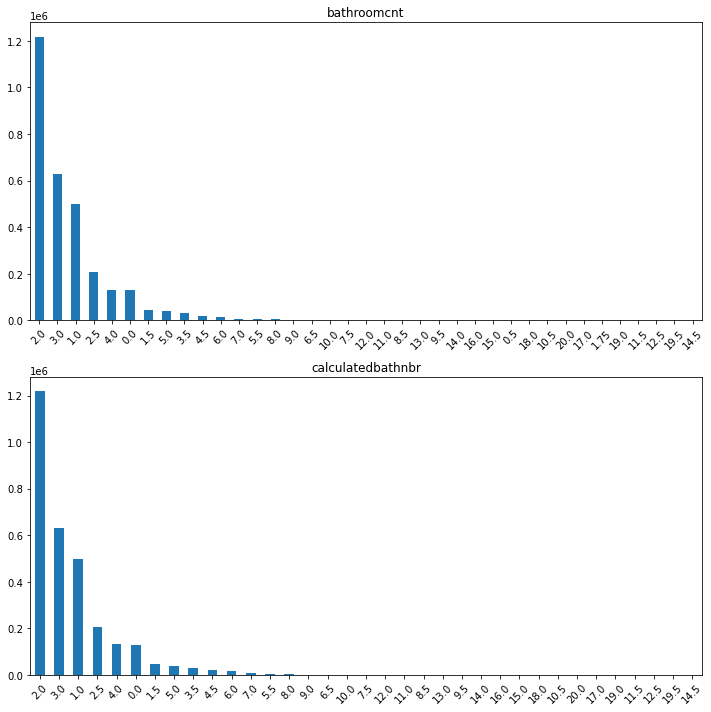

In [57]:
# Plot bar charts

columns = ['bathroomcnt','calculatedbathnbr']

plt.subplots(figsize = (10, 10))

counter = 0

for col in columns:
    counter +=1
    plt.subplot(2, 1, counter)
    numeric_2016[col].value_counts().plot.bar(rot = 45)
    plt.title(columns[counter - 1])
    
plt.tight_layout();

- The distributions and the shape of the graphs show that <b>both columns contain the same set of data. Thus, one of them should be removed.</b>

In [58]:
numeric_2016.drop(columns = 'calculatedbathnbr',axis = 1, inplace = True)

In [59]:
# Overview of the update dataset

numeric_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   bathroomcnt                 float64
 1   bedroomcnt                  float64
 2   finishedsquarefeet12        float64
 3   fullbathcnt                 float64
 4   latitude                    float64
 5   longitude                   float64
 6   lotsizesquarefeet           float64
 7   roomcnt                     float64
 8   unitcnt                     float64
 9   structuretaxvaluedollarcnt  float64
 10  taxvaluedollarcnt           float64
 11  landtaxvaluedollarcnt       float64
 12  taxamount                   float64
 13  ageinyear                   float64
 14  assessedvalue               float64
dtypes: float64(15)
memory usage: 341.6 MB


## Exploratory Data Analysis

#### Data Distribution

In [33]:
# Check the distribution

a = numeric_2016['ageinyear'].value_counts(normalize = True) * 100

In [31]:
a.head(15)

61.0    3.028282
66.0    2.602888
62.0    2.505975
63.0    2.293278
60.0    2.247163
52.0    2.219576
65.0    1.937791
53.0    1.866243
64.0    1.859816
69.0    1.811992
68.0    1.801907
27.0    1.795378
43.0    1.759279
51.0    1.691764
54.0    1.657751
Name: ageinyear, dtype: float64

In [42]:
numeric_2016['ageinyear'].describe().T

count    2.925289e+06
mean     5.173836e+01
std      2.344132e+01
min      1.000000e+00
25%      3.500000e+01
50%      5.300000e+01
75%      6.600000e+01
max      2.150000e+02
Name: ageinyear, dtype: float64

In [39]:
numeric_2016['assessedvalue'].describe()

count    2.905052e+06
mean     4.246594e+05
std      7.273978e+05
min      9.000000e+00
25%      1.843260e+05
50%      3.091400e+05
75%      4.910410e+05
max      2.827860e+08
Name: assessedvalue, dtype: float64

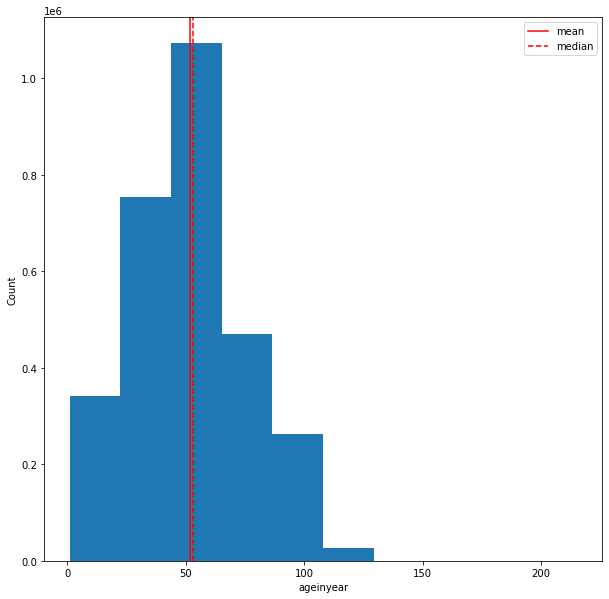

In [22]:
# Plot a histogram for numeric_2016['assessedvalue']

plt.figure(figsize=(10,10))

plt.hist(numeric_2016['ageinyear'])
plt.xlabel('ageinyear')
plt.ylabel('Count')
plt.axvline(numeric_2016['ageinyear'].mean(), label = 'mean', c = 'r')
plt.axvline(numeric_2016['ageinyear'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

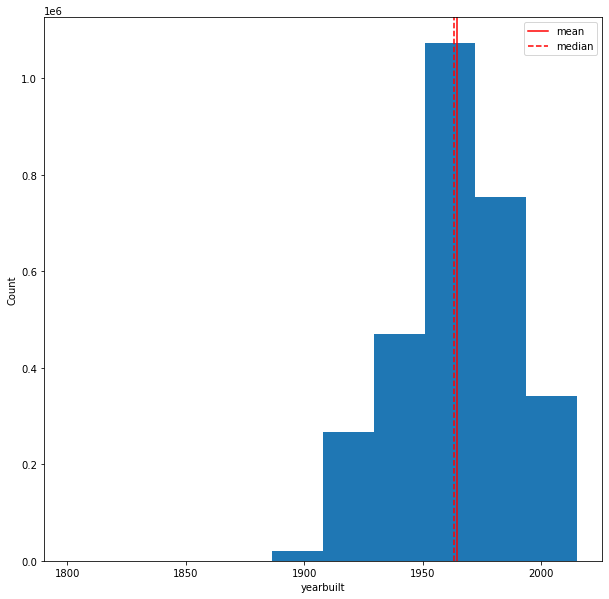

In [37]:
# Plot a histogram for numeric_2016['assessedvalue']

plt.figure(figsize=(10,10))

plt.hist(cate_2016['yearbuilt'])
plt.xlabel('yearbuilt')
plt.ylabel('Count')
plt.axvline(cate_2016['yearbuilt'].mean(), label = 'mean', c = 'r')
plt.axvline(cate_2016['yearbuilt'].median(), label = 'median', c = 'r', linestyle = '--')

plt.legend()
plt.show()

In [20]:
# Check the distribution

numeric_2016['assessedvalue'].value_counts(normalize = True) * 100

400000.0     0.053906
350000.0     0.051910
450000.0     0.050154
500000.0     0.046058
420000.0     0.043407
               ...   
433224.0     0.000034
1065498.0    0.000034
213437.0     0.000034
417087.0     0.000034
530550.0     0.000034
Name: assessedvalue, Length: 626426, dtype: float64

<Figure size 432x288 with 0 Axes>

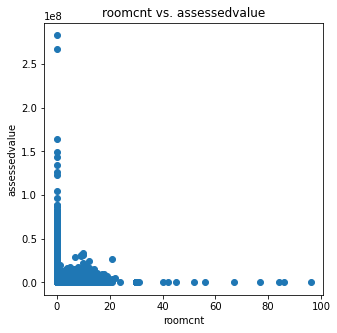

In [66]:
# Create a scatter plot

plt.figure()
fig,ax = plt.subplots(figsize = (5, 5))

plt.scatter(numeric_2016['roomcnt'], numeric_2016['assessedvalue'])
plt.title('roomcnt vs. assessedvalue')
plt.xlabel('roomcnt')
plt.ylabel('assessedvalue')

plt.show();

<Figure size 432x288 with 0 Axes>

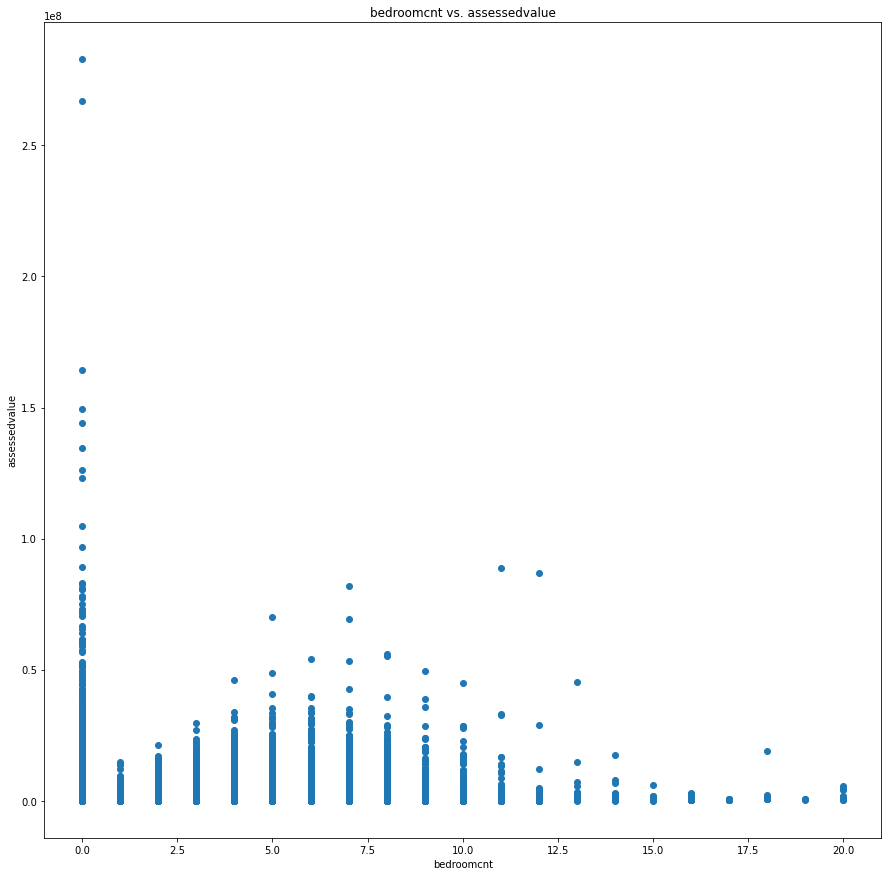

In [25]:
# Create a scatter plot

plt.figure()
fig,ax = plt.subplots(figsize = (15, 15))

plt.scatter(numeric_2016['bedroomcnt'], numeric_2016['assessedvalue'])
plt.title('bedroomcnt vs. assessedvalue')
plt.xlabel('bedroomcnt')
plt.ylabel('assessedvalue')

plt.show()

<Figure size 432x288 with 0 Axes>

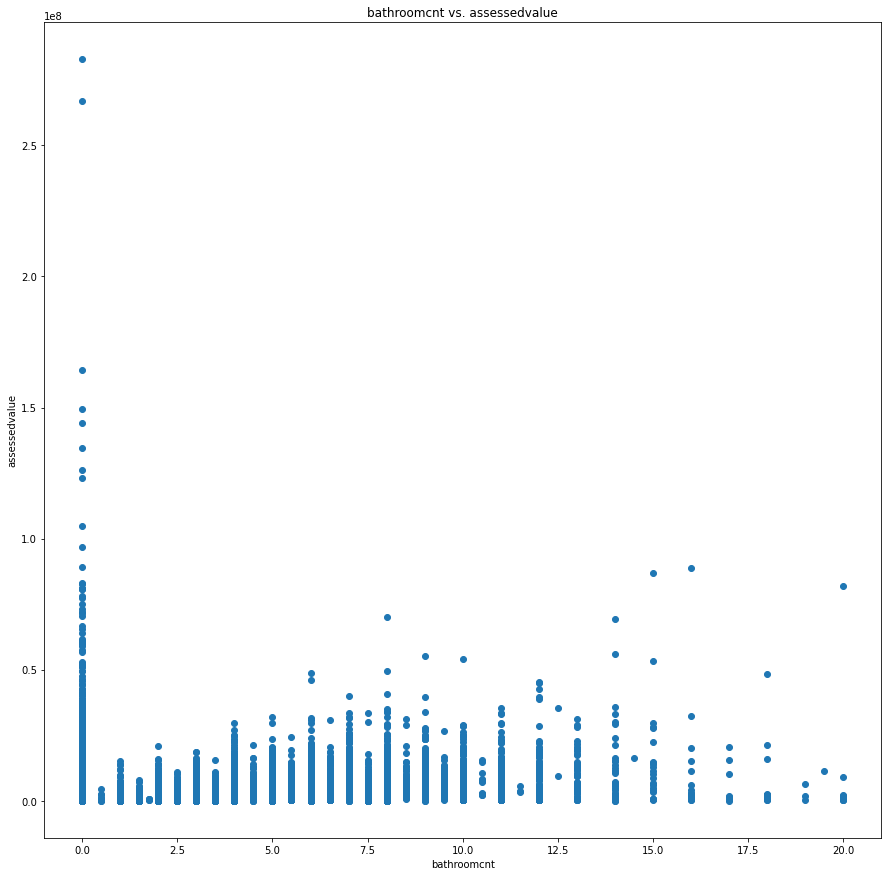

In [26]:
# Create a scatter plot

plt.figure()
#fig,ax = plt.subplots(figsize = (15, 15))

plt.scatter(numeric_2016['bathroomcnt'], numeric_2016['assessedvalue'])
plt.title('bathroomcnt vs. assessedvalue')
plt.xlabel('bathroomcnt')
plt.ylabel('assessedvalue')

plt.show()

<Figure size 432x288 with 0 Axes>

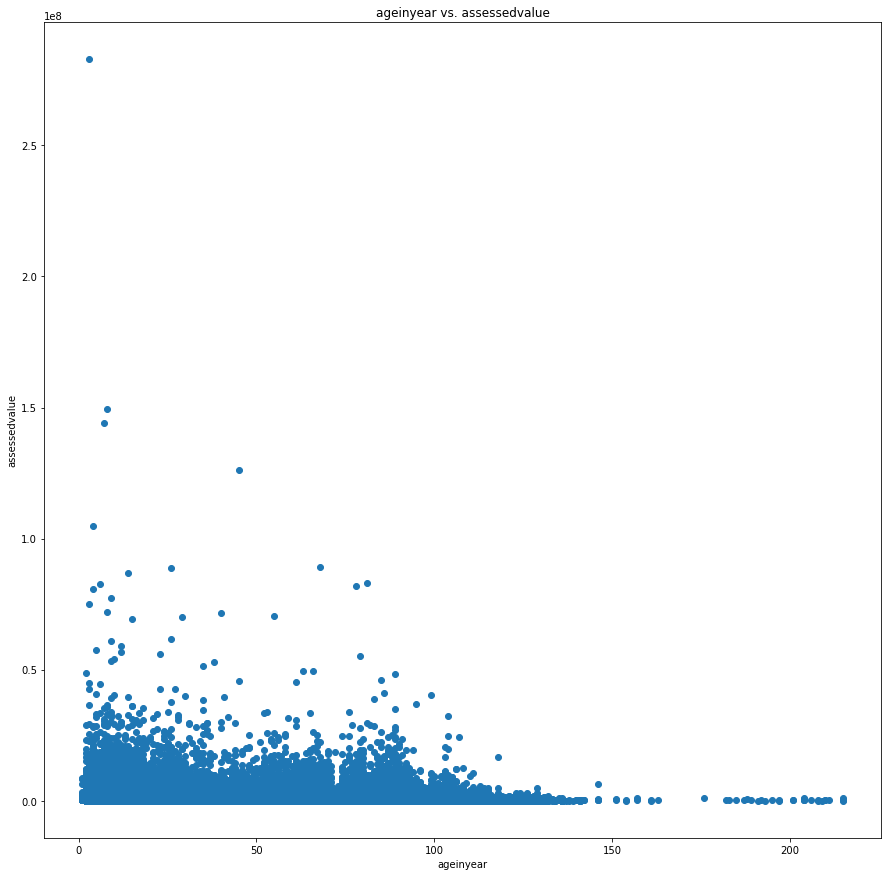

In [27]:
# Create a scatter plot

plt.figure()
fig,ax = plt.subplots(figsize = (15, 15))

plt.scatter(numeric_2016['ageinyear'], numeric_2016['assessedvalue'])
plt.title('ageinyear vs. assessedvalue')
plt.xlabel('ageinyear')
plt.ylabel('assessedvalue')

plt.show();

In [63]:
# Check the distribution

numeric_2016['bathroomcnt'].value_counts(normalize = True) * 100

2.00     40.823297
3.00     21.082253
1.00     16.726757
2.50      6.929346
4.00      4.424335
0.00      4.290341
1.50      1.537074
5.00      1.281012
3.50      1.030243
4.50      0.637039
6.00      0.544416
7.00      0.205982
5.50      0.192515
8.00      0.151982
9.00      0.044519
6.50      0.040768
10.00     0.016749
7.50      0.012729
12.00     0.008877
11.00     0.006934
8.50      0.003551
13.00     0.001742
9.50      0.001675
14.00     0.001507
16.00     0.001005
15.00     0.000804
0.50      0.000569
18.00     0.000502
10.50     0.000402
20.00     0.000335
17.00     0.000234
1.75      0.000167
19.00     0.000100
11.50     0.000100
12.50     0.000067
19.50     0.000033
14.50     0.000033
Name: bathroomcnt, dtype: float64

In [18]:
# Check the distribution

numeric_2016['bedroomcnt'].value_counts(normalize = True) * 100

3.0     39.325946
4.0     24.448856
2.0     20.356908
5.0      6.094021
0.0      4.084584
1.0      2.912468
6.0      1.633047
8.0      0.455819
7.0      0.428547
9.0      0.144362
10.0     0.058041
12.0     0.032988
11.0     0.014762
13.0     0.002993
14.0     0.002455
16.0     0.002186
15.0     0.000874
20.0     0.000437
18.0     0.000336
17.0     0.000269
19.0     0.000101
Name: bedroomcnt, dtype: float64

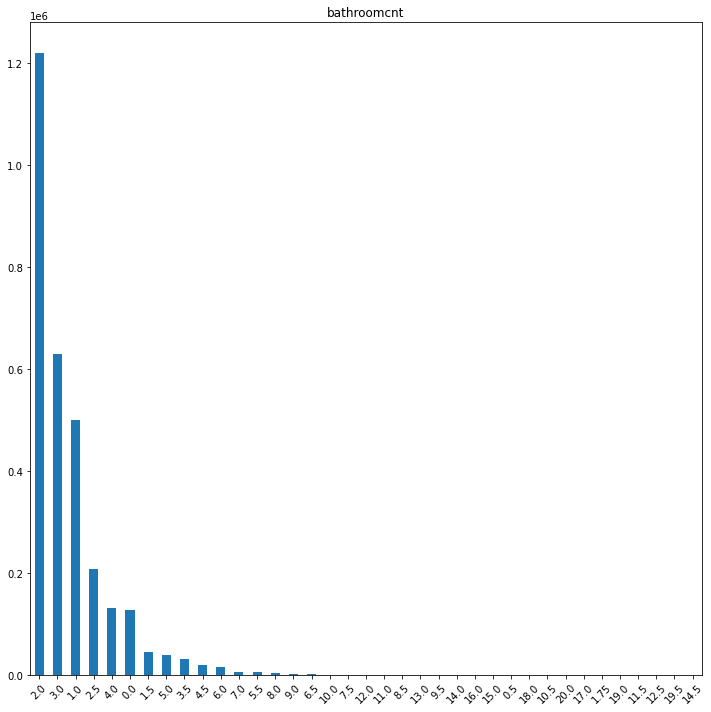

In [64]:
# Plot bar charts

columns = ['bathroomcnt']

plt.subplots(figsize = (10, 10))

counter = 0

for col in columns:
    counter +=1
    plt.subplot(1, 1, counter)
    numeric_2016[col].value_counts().plot.bar(rot = 45)
    plt.title(columns[counter - 1])
    
plt.tight_layout();

- The majority, 40%, of the properties has <b>2 bathrooms.</b>

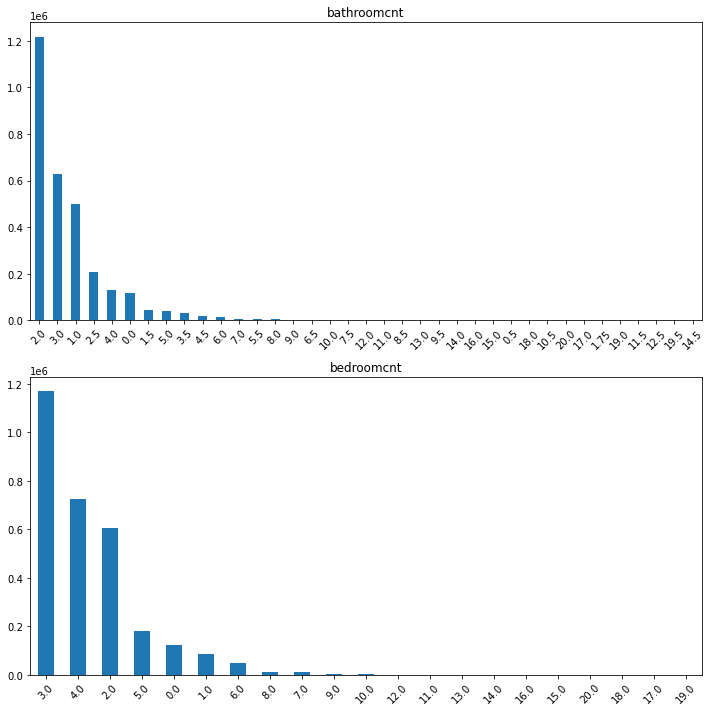

In [16]:
# Plot bar charts

columns = ['bathroomcnt','bedroomcnt']

plt.subplots(figsize = (10, 10))

counter = 0

for col in columns:
    counter +=1
    plt.subplot(2, 1, counter)
    numeric_2016[col].value_counts().plot.bar(rot = 45)
    plt.title(columns[counter - 1])
    
plt.tight_layout();